### This is a dataset of cross-sectional MRI data in young, middle aged, nondemented and demented older adults, found here https://www.kaggle.com/jboysen/mri-and-alzheimers

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_cross = pd.read_csv('/content/oasis_cross-sectional.csv', sep=',')
df_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [5]:
df_long = pd.read_csv('/content/oasis_longitudinal.csv', sep=',')
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
pd.isnull(df_long).sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
pd.isnull(df_long.dropna(axis=0, how='any')).sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [8]:
df_long.shape

(373, 15)

In [9]:
df_long.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [10]:
df_long.rename(columns={'M/F': 'Sex'}, inplace=True)
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [11]:
df_long.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [12]:
df_long.Group.describe()

count             373
unique              3
top       Nondemented
freq              190
Name: Group, dtype: object

In [13]:
df_long.Group.unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [14]:
demented = df_long[df_long.Group=='Demented']
demented.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286


In [15]:
demented.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,146.000000,146.000000,146.000000,146.000000,127.000000,144.000000,146.000000,146.000000,146.000000,146.000000
mean,1.732877,452.541096,76.260274,13.671233,2.771654,24.513889,0.671233,1485.849315,0.716301,1.196890
std,0.790383,513.838511,6.940193,2.898536,1.196483,4.497064,0.296173,173.769461,0.031921,0.137177
min,1.000000,0.000000,61.000000,6.000000,1.000000,4.000000,0.500000,1143.000000,0.646000,0.897000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,22.000000,0.500000,1357.000000,0.694250,1.120000
50%,2.000000,490.500000,76.000000,13.000000,3.000000,26.000000,0.500000,1476.500000,0.712000,1.188500
75%,2.000000,693.250000,81.000000,16.000000,4.000000,28.000000,1.000000,1566.500000,0.737000,1.293000
max,5.000000,2508.000000,98.000000,20.000000,5.000000,30.000000,2.000000,1957.000000,0.806000,1.535000


In [16]:
nondemented = df_long[df_long.Group=='Nondemented']
nondemented.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [17]:
nondemented.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.968421,670.242105,77.057895,15.142105,2.394737,29.226316,0.005263,1495.500000,0.740900,1.191063
std,0.980796,672.807019,8.096104,2.742149,1.047534,0.882722,0.051163,184.888262,0.037705,0.144029
min,1.000000,0.000000,60.000000,8.000000,1.000000,26.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,13.000000,2.000000,29.000000,0.000000,1358.250000,0.717250,1.073750
50%,2.000000,631.000000,77.000000,16.000000,2.000000,29.000000,0.000000,1474.500000,0.739000,1.190000
75%,2.750000,1129.750000,82.000000,18.000000,3.000000,30.000000,0.000000,1634.750000,0.769000,1.292500
max,5.000000,2517.000000,97.000000,23.000000,5.000000,30.000000,0.500000,2004.000000,0.837000,1.587000


In [18]:
converted = df_long[df_long.Group=='Converted']
converted.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,R,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,R,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093


In [19]:
converted.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,37.000000,37.000000,37.000000,37.000000,37.00000,37.000000,37.000000,37.000000,37.00000,37.000000
mean,2.027027,771.810811,79.756757,15.459459,1.72973,28.675676,0.256757,1459.270270,0.72373,1.212405
std,1.040472,767.296366,7.425203,2.523166,0.96173,1.564432,0.253356,135.432773,0.03543,0.109295
min,1.000000,0.000000,65.000000,12.000000,1.00000,24.000000,0.000000,1264.000000,0.66600,1.019000
25%,1.000000,0.000000,74.000000,14.000000,1.00000,28.000000,0.000000,1383.000000,0.69600,1.106000
50%,2.000000,706.000000,81.000000,16.000000,1.00000,29.000000,0.500000,1423.000000,0.71800,1.234000
75%,3.000000,1422.000000,86.000000,18.000000,2.00000,30.000000,0.500000,1587.000000,0.75000,1.269000
max,5.000000,2639.000000,92.000000,20.000000,4.00000,30.000000,0.500000,1722.000000,0.79900,1.388000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


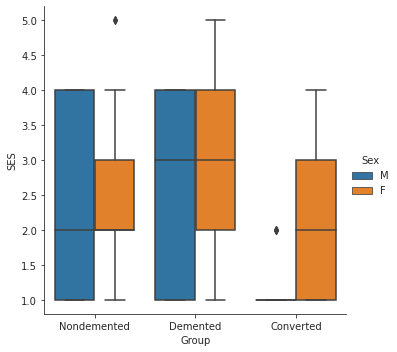

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'SES', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'SES')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


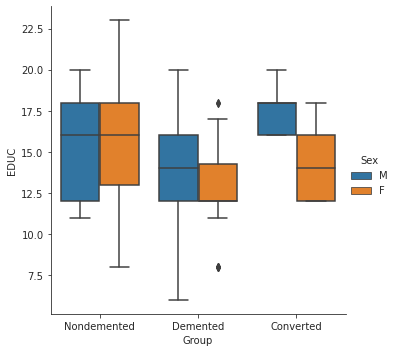

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'EDUC', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'EDUC')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


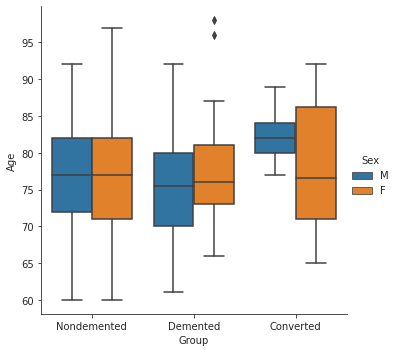

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'Age', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'Age')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


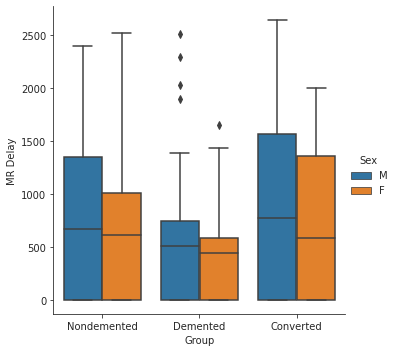

In [25]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'MR Delay', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'MR Delay')

Text(0.5, 1.0, 'Dementia by gender')

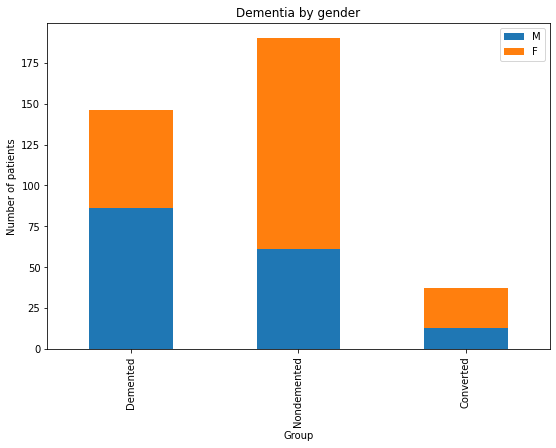

In [26]:
def bar_chart(feature):
    Demented = df_long[df_long.Group=='Demented'][feature].value_counts()
    Nondemented = df_long[df_long.Group=='Nondemented'][feature].value_counts()
    Converted = df_long[df_long.Group=='Converted'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented,Converted])
    df_bar.index = ['Demented','Nondemented','Converted']
    df_bar.plot(kind='bar',stacked=True, figsize=(9,6))
    
bar_chart('Sex')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Dementia by gender')

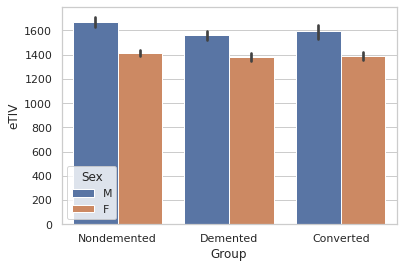

In [27]:
import seaborn as sns
sns.set(style='whitegrid')
sns.barplot(x='Group', y='eTIV', hue='Sex', data=df_long)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


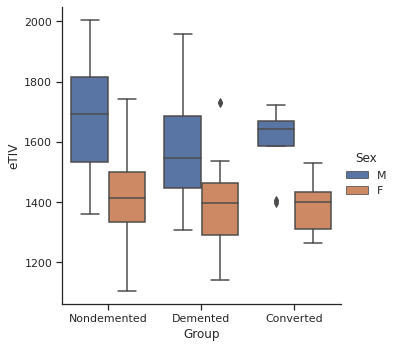

In [28]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'eTIV', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'eTIV')

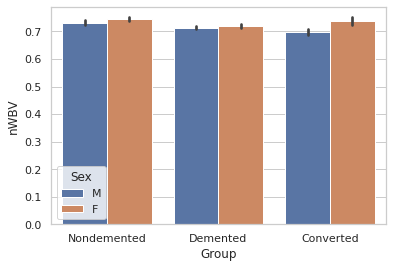

In [29]:
sns.set(style='whitegrid')
sns.barplot(x='Group', y='nWBV', hue='Sex', data=df_long)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


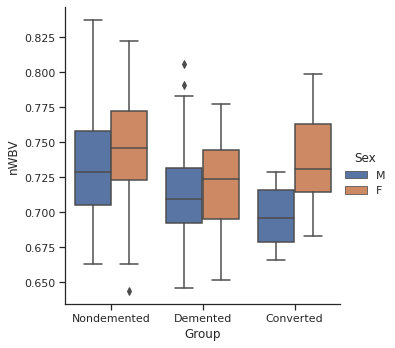

In [30]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'nWBV', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'nWBV')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


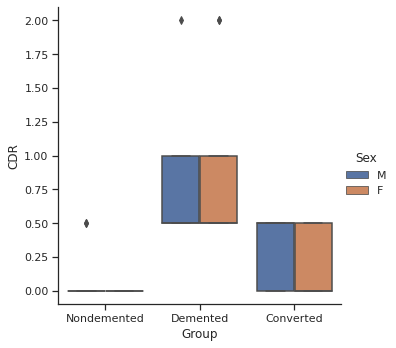

In [31]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'CDR', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'CDR')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


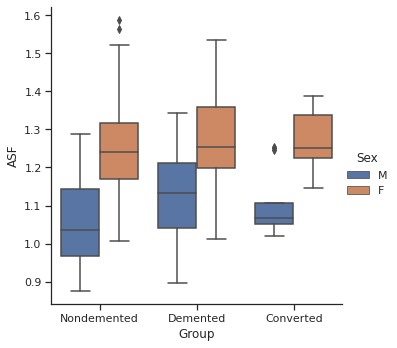

In [32]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('Group', 'ASF', 'Sex', data=df_long, kind='box')
    g.set_axis_labels('Group', 'ASF')

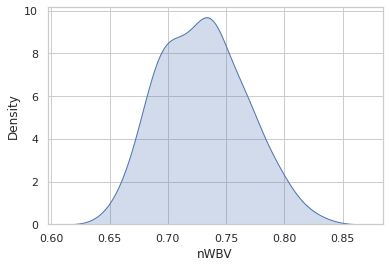

In [33]:
sns.kdeplot(df_long['nWBV'], shade=True)